In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import scipy.interpolate as interp

In [19]:
X = np.linspace(0,1)
Y = np.arctan(X)
Z = np.exp(-X)
YZ = np.array([Y,Z])

### PCHIP interpolator

In [26]:
f = interp.PchipInterpolator(X, YZ, axis=1)

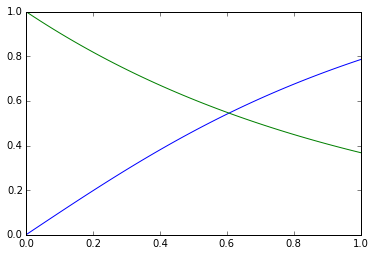

In [27]:
plt.plot(X, f(X)[0,:])
plt.plot(X, f(X)[1,:])

### B-Splines

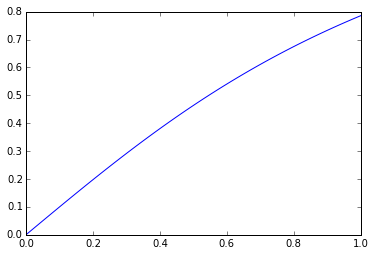

In [31]:
tck = interp.splrep(X, Y)
plt.plot(X, interp.splev(X, tck))

### Piecewise Polynomial

In [32]:
interp.PiecewisePolynomial(X, YZ)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [10]:
class Slerp:
    def __init__(self, v0, v1):
        dot_threshold = 0.9995
        
        self.v0 = v0
        self.v1 = v1
        
        dot = np.dot(v0, v1)
        self.theta_0 = np.arccos(dot)
        
        v2_unnormalized = v1 - v0*dot
        self.v2 = v2_unnormalized/np.linalg.norm(v2_unnormalized)        
        
        if dot > dot_threshold:
            self.__call__ = self.linear_interp
        else:
            self.__call__ = self.slerp
        
    def linear_interp(self, t):
        unnormalized_result = self.v0 + t*(self.v1 - self.v0)
        return unnormalized_result / np.linalg.norm(unnormalized_result)

    def slerp(self, t):
        theta = self.theta_0 * t
        return self.v0*np.cos(theta) + self.v2*np.sin(theta)
        

In [11]:
sl = Slerp(np.array([1,0,0,0]), np.array([0,1,0,0]))

In [18]:
T = np.linspace(0,1)
Q = np.array([ sl(t) for t in T])

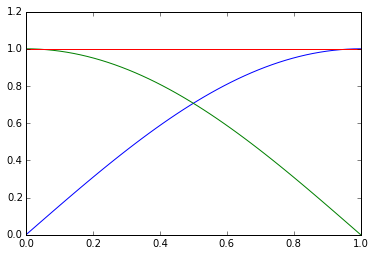

In [21]:
plt.plot(T,Q[:,1])
plt.plot(T,Q[:,0])
plt.plot(T,Q[:,1]**2 + Q[:,0]**2)